# MSCS 634 - Lab 2
# Name: Swarna Anjani Devershetty
# Course Title: MSCS 634 - Machine Learning
# Lab Assignment: Lab 2 - Classification Using KNN and RNN Algorithms


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Step 1: Load and Prepare the Dataset
wine = load_wine()
X = wine.data
y = wine.target

# Basic data exploration
print("Feature names:", wine.feature_names)
print("Target classes:", np.unique(y))
print("Class distribution:\n", pd.Series(y).value_counts())

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target classes: [0 1 2]
Class distribution:
 1    71
0    59
2    48
Name: count, dtype: int64


In [2]:

# Step 2: Implement K-Nearest Neighbors (KNN)
k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
    print(f"KNN accuracy with k={k}: {acc:.4f}")


KNN accuracy with k=1: 0.7778
KNN accuracy with k=5: 0.8056
KNN accuracy with k=11: 0.8056
KNN accuracy with k=15: 0.8056
KNN accuracy with k=21: 0.8056


In [3]:

# Step 3: Implement Radius Neighbors (RNN)
radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

for radius in radius_values:
    # Use 'distance' weighting to handle the large radius values
    rnn = RadiusNeighborsClassifier(radius=radius, weights='distance', outlier_label=2)  
    # Note: outlier_label=2 assigns outliers to class '2' (last class) to avoid errors
    rnn.fit(X_train, y_train)
    y_pred_rnn = rnn.predict(X_test)
    acc_rnn = accuracy_score(y_test, y_pred_rnn)
    rnn_accuracies.append(acc_rnn)
    print(f"RNN accuracy with radius={radius}: {acc_rnn:.4f}")


RNN accuracy with radius=350: 0.7500
RNN accuracy with radius=400: 0.7500
RNN accuracy with radius=450: 0.7778
RNN accuracy with radius=500: 0.7778
RNN accuracy with radius=550: 0.7778
RNN accuracy with radius=600: 0.7778


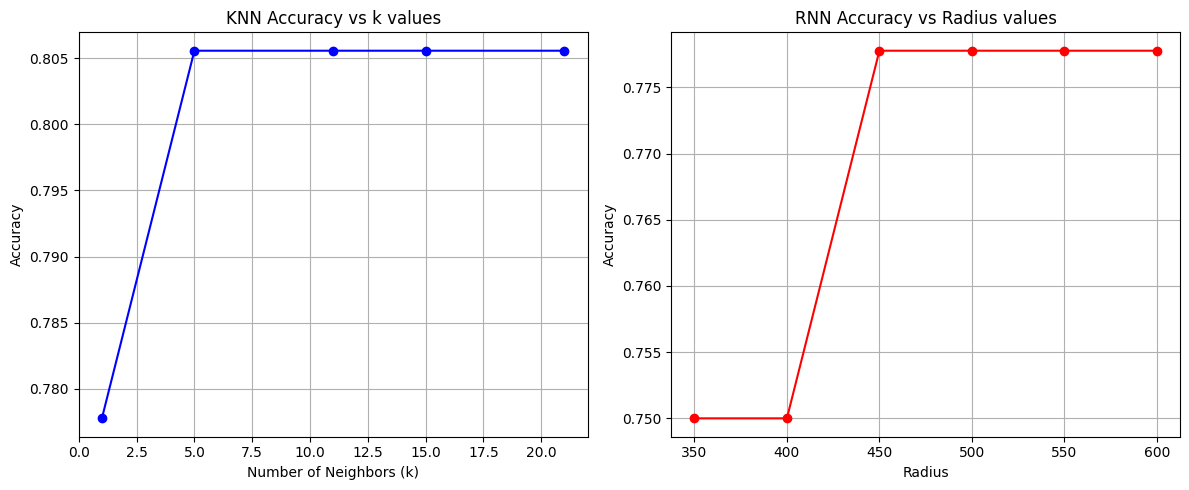


Observations:
- KNN accuracy varies with k, usually improving until an optimal point and then stabilizing or declining.
- RNN accuracy changes with radius; too small or too large radius can negatively impact performance.
- KNN may be preferable when the number of neighbors is known and tuning k is straightforward.
- RNN can be useful when neighborhood size varies and a radius-based approach adapts better to data density.


In [4]:

# Step 4: Visualize and Compare Results

plt.figure(figsize=(12, 5))

# Plot for KNN accuracies
plt.subplot(1, 2, 1)
plt.plot(k_values, knn_accuracies, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy vs k values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot for RNN accuracies
plt.subplot(1, 2, 2)
plt.plot(radius_values, rnn_accuracies, marker='o', linestyle='-', color='r')
plt.title('RNN Accuracy vs Radius values')
plt.xlabel('Radius')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

# Observations:
print("\nObservations:")
print("- KNN accuracy varies with k, usually improving until an optimal point and then stabilizing or declining.")
print("- RNN accuracy changes with radius; too small or too large radius can negatively impact performance.")
print("- KNN may be preferable when the number of neighbors is known and tuning k is straightforward.")
print("- RNN can be useful when neighborhood size varies and a radius-based approach adapts better to data density.")